# Lab 4: AI in enterprise systems
---

<br>

**By:** Ramasubramanian Dharumaperumal

**Student ID:** 100810343

In [25]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

In [4]:
df = pd.read_csv('./Fish.csv')

In [5]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

<AxesSubplot:xlabel='Species', ylabel='count'>

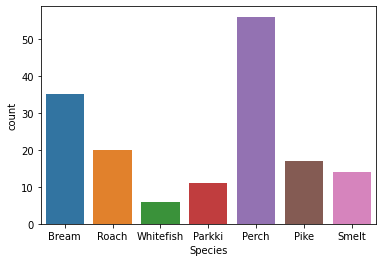

In [11]:
sns.countplot(x='Species', data=df)

In [12]:
X = df.drop('Species', axis=1)

In [13]:
y = df['Species']

In [14]:
X, y

(     Weight  Length1  Length2  Length3   Height   Width
 0     242.0     23.2     25.4     30.0  11.5200  4.0200
 1     290.0     24.0     26.3     31.2  12.4800  4.3056
 2     340.0     23.9     26.5     31.1  12.3778  4.6961
 3     363.0     26.3     29.0     33.5  12.7300  4.4555
 4     430.0     26.5     29.0     34.0  12.4440  5.1340
 ..      ...      ...      ...      ...      ...     ...
 154    12.2     11.5     12.2     13.4   2.0904  1.3936
 155    13.4     11.7     12.4     13.5   2.4300  1.2690
 156    12.2     12.1     13.0     13.8   2.2770  1.2558
 157    19.7     13.2     14.3     15.2   2.8728  2.0672
 158    19.9     13.8     15.0     16.2   2.9322  1.8792
 
 [159 rows x 6 columns],
 0      Bream
 1      Bream
 2      Bream
 3      Bream
 4      Bream
        ...  
 154    Smelt
 155    Smelt
 156    Smelt
 157    Smelt
 158    Smelt
 Name: Species, Length: 159, dtype: object)

In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y_map = {index:label for index,label in enumerate(encoder.classes_)}

In [16]:
y_map

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

In [20]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [21]:
log_model.score(X_test,y_test)

0.85

### Now let us perform prediction

In [22]:
y_pred_log = log_model.predict(X_test)

In [23]:
matrix = confusion_matrix(y_test, y_pred_log)

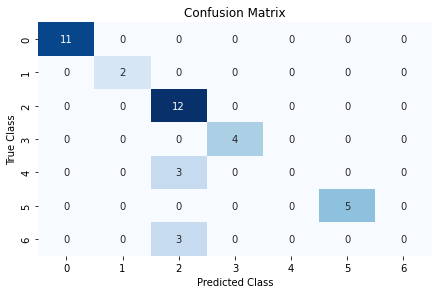

{0: 'Bream', 1: 'Parkki', 2: 'Perch', 3: 'Pike', 4: 'Roach', 5: 'Smelt', 6: 'Whitefish'}


In [26]:
sns.heatmap(matrix, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()
print(y_map)